# K-means Examples

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import datasets
from sklearn.datasets.samples_generator import make_blobs


## Easy Example

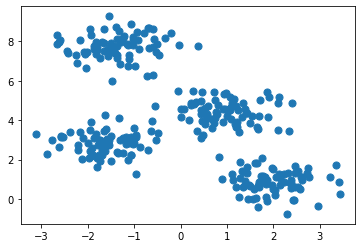

In [17]:
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

So let's see how K-means will find this rather obviously clustered data.


In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

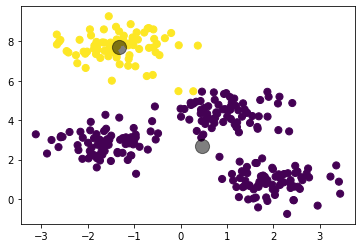

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

So 2 picks up one but not the others. Let's try again:

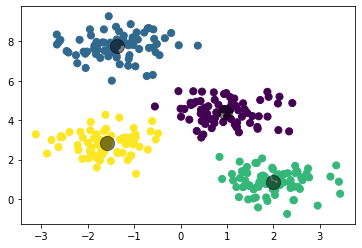

In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

What would our Heuristics say?

In [18]:
class Kmeans_Model:
    def __init__(self,data,num_clusters):
        self.df = StandardScaler().fit_transform(data)
        self.K = num_clusters
        
    def fit(self):    
        self.model = KMeans(self.K).fit(self.df)
    
    def predict(self):
        self.prediction = self.model.predict(self.df)
        return self.prediction
    
    def sil_score(self):
        return silhouette_score(self.df,self.model.predict(self.df),sample_size=10000)
    
def score_by_k(data,K):
    model = Kmeans_Model(data,K)
    model.fit()
    return model.sil_score()

def inertia_by_k(data,K):
    model = Kmeans_Model(data,K)
    model.fit()
    return model.model.inertia_


In [29]:
K=20

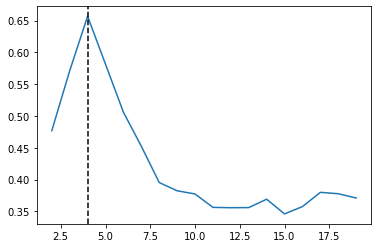

In [30]:
sil_scores =[score_by_k(X,i) for i in range(2,K)]
plt.plot(list(range(2,K)),sil_scores)
plt.axvline(4,color="black",ls="--")

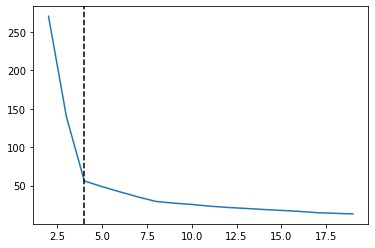

In [43]:
init_scores =[inertia_by_k(X,i) for i in range(2,K)]
plt.plot(list(range(2,K)),init_scores)
plt.axvline(4,color="black",ls="--")

Pretty clear what the optimum is.

Let's try a more connected dataset.

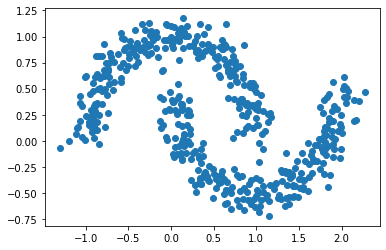

In [44]:
noisy_moons = datasets.make_moons(n_samples=500, noise=.1)

plt.scatter(noisy_moons[0][:,0],noisy_moons[0][:,1])

In [45]:
X2 = noisy_moons[0]

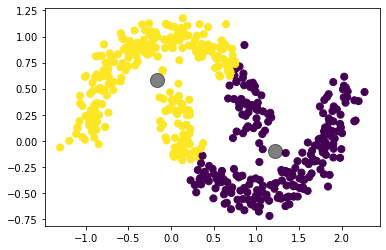

In [47]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X2)
y_kmeans = kmeans.predict(X2)

plt.scatter(X2[:, 0], X2[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

Not so good. Let's look at heuristics.

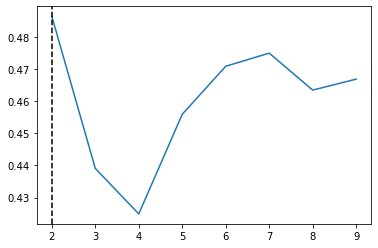

In [49]:
K = 10
sil_scores =[score_by_k(X2,i) for i in range(2,K)]
plt.plot(list(range(2,K)),sil_scores)
plt.axvline(2,color="black",ls="--")

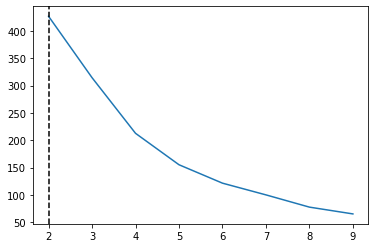

In [51]:
init_scores =[inertia_by_k(X2,i) for i in range(2,K)]
plt.plot(list(range(2,K)),init_scores)
plt.axvline(2,color="black",ls="--")

So in the case of this data, we would not be able to determine any optimal value.

## Consumption Clustering of Households

Going back to our LSMS example, let's look at how households spend their money across food, non-food items, and education.

In [53]:
df = pd.read_csv("../../Data/Analysis/ETH_2011_ERSS_v02_M_CSV/ETH_2011_ERSS_v02_M_CSV/cons_agg_w1.csv")
df = df.dropna()
df = df.set_index("household_id")

In [54]:
df

,ea_id,saq01,rural,pw,adulteq,hh_size,no_conv,no_cons,food_cons_ann,nonfood_cons_ann,educ_cons_ann,total_cons_ann,price_index_hce,nom_totcons_aeq,cons_quint
household_id,,,,,,,,,,,,,,,
1010101601002,1010101601,1,1,2236.134521,6.62,8,0,0,10816.000488,4560.0,92.0,15468.000000,1.034,2336.555908,2.0
1010101601017,1010101601,1,1,2236.134521,5.70,7,0,0,8034.000488,4066.0,0.0,12100.000000,1.034,2122.807129,1.0
1010101601034,1010101601,1,1,2236.134521,0.74,1,0,0,2652.000000,1874.0,0.0,4526.000000,1.034,6116.216309,4.0
1010101601049,1010101601,1,1,2236.134521,3.12,4,0,0,8606.000000,2162.0,88.0,10856.000000,1.034,3479.487305,3.0
1010101601064,1010101601,1,1,2236.134521,3.30,4,0,0,14583.126367,3756.0,108.0,18447.125000,1.034,5590.038086,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15010203102067,15010203102,15,1,149.060715,4.32,6,0,0,17368.000000,2836.0,80.0,20284.000000,1.245,4695.370117,4.0
15010203102087,15010203102,15,1,149.060715,4.62,6,0,0,42588.000000,6669.0,193.0,49450.000000,1.245,10703.463867,5.0
15010203102099,15010203102,15,1,149.060715,5.22,6,0,0,10505.529480,1299.0,140.0,11944.529297,1.245,2288.224121,2.0


In [55]:
cols_of_interest = ["nonfood_cons_ann","educ_cons_ann","food_cons_ann"]


In [56]:
px.scatter_3d(df,x=cols_of_interest[0],y=cols_of_interest[1],z=cols_of_interest[2])

In [57]:
cons = pd.DataFrame(df[cols_of_interest].values / df[['adulteq']].values)

cons.columns = cols_of_interest
cons.index = df.index
cons_std = (cons - cons.mean())/cons.std()

In [58]:
kmeans = KMeans(6)
kmeans = kmeans.fit(cons_std)
cons_std['cluster'] = kmeans.predict(cons_std)

In [59]:
px.scatter_3d(cons_std,x=cols_of_interest[0],y=cols_of_interest[1],z=cols_of_interest[2],color='cluster')

In [236]:
class Kmeans_Model:
    def __init__(self,data,num_clusters):
        self.df = StandardScaler().fit_transform(data)
        self.K = num_clusters
        
    def fit(self):    
        self.model = KMeans(self.K).fit(self.df)
    
    def predict(self):
        self.prediction = self.model.predict(self.df)
        return self.prediction
    
    def sil_score(self):
        return silhouette_score(self.df,self.model.predict(self.df),sample_size=10000)
    
def score_by_k(data,K):
    model = Kmeans_Model(data,K)
    model.fit()
    return model.sil_score()

def inertia_by_k(data,K):
    model = Kmeans_Model(data,K)
    model.fit()
    return model.model.inertia_



### What do you think?

In [237]:
cols_of_interest = ['nonfood_cons_ann','food_cons_ann',"educ_cons_ann"]

Text(0.5, 1.0, 'Silhouette Score')

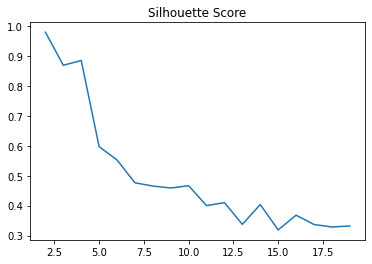

In [60]:
scores = [score_by_k(df[cols_of_interest],x) for x in range(2,20)]

import matplotlib.pyplot as plt
plt.plot(list(range(2,20)),scores)
plt.title("Silhouette Score")

Text(0.5, 1.0, 'Inertia Score')

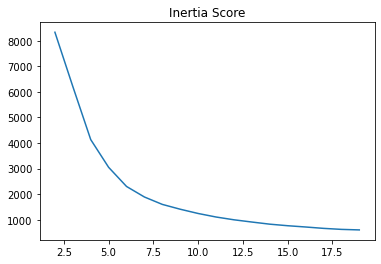

In [61]:
inertia_scores = [inertia_by_k(df[cols_of_interest],x) for x in range(2,20)]
plt.plot(list(range(2,20)),inertia_scores)
plt.title("Inertia Score")